In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from time import time
import datetime
import seaborn as sns

In [2]:
data_train=pd.read_csv('data_train.csv',encoding='utf-8',index_col=0)
data_train2 = data_train[['AngM1-N-M2', 'dM1-M2',  'MagM1',  'RM1',
      'NoutM1', 'Hf,oxM1','XM1', 'EAM1', 'EiM1',
       'MagM2',  'RM2', 'NoutM2', 'Hf,oxM2',
        'XM2', 'EAM2', 'EiM2','Uorr']]

In [3]:
x=data_train2.iloc[:, 0:-1].values
y=data_train2.iloc[:,-1].values
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)

In [5]:
model = RFR(n_estimators=500
           ,random_state=1
           ,criterion="mse"
           ,min_samples_split=3   
           ,min_samples_leaf=3    
           ,max_depth=3          
           ,max_features=16       
           ,max_leaf_nodes=5)

model.fit(x_train,y_train)
score=model.score(x_test,y_test)
score

C:\Users\Administrator\anaconda3\envs\ml37\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


0.7560654016522348

In [6]:
y_pred_train_model=model.predict(x_train)
y_pred_test_model=model.predict(x_test)

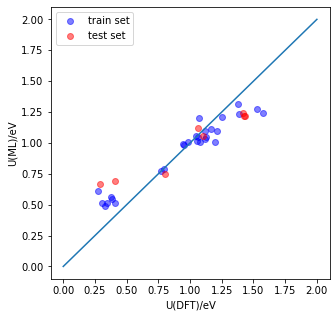

In [7]:
plt.figure(figsize=(5,5))
plt.plot([0,2],[0,2])
plt.scatter(y_train,y_pred_train_model,alpha=0.5,color='blue',label='train set')
plt.scatter(y_test,y_pred_test_model,alpha=0.5,color='red',label='test set')
plt.xlabel('U(DFT)/eV')
plt.ylabel('U(ML)/eV')
plt.legend()
plt.savefig('rfr.png', dpi=300, format='png')
plt.show()

In [8]:
rmse = np.sqrt(mse(y_train,model.predict(x_train)))
r2 = r2_score(y_train,model.predict(x_train))
rmset = np.sqrt(mse(y_test,model.predict(x_test)))
r2t = r2_score(y_test,model.predict(x_test))

print(rmse)
print(r2)
print(rmset)
print(r2t)

0.1435181780156456
0.8605003783328431
0.21065828619454802
0.7560654016522348
